<a href="https://colab.research.google.com/github/Noshin91/Project-1/blob/main/Hospital_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import random

# Simulate dataset
np.random.seed(42)
n = 500

departments = ['Cardiology', 'Neurology', 'Orthopedics', 'Emergency', 'Pediatrics']
doctors = ['Dr. A', 'Dr. B', 'Dr. C', 'Dr. D', 'Dr. E']

data = pd.DataFrame({
    'Patient_ID': np.arange(1, n+1),
    'Department': np.random.choice(departments, n),
    'Doctor': np.random.choice(doctors, n),
    'Age': np.random.randint(1, 90, n),
    'Admission_Date': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 180, n), unit='d'),
    'Stay_Duration': np.random.poisson(3, n),
    'Cost': np.random.normal(loc=3000, scale=1000, size=n).round(2),
    'Satisfaction': np.random.choice([1, 2, 3, 4, 5], n, p=[0.05, 0.1, 0.2, 0.4, 0.25]),
    'Outcome': np.random.choice(['Recovered', 'Ongoing', 'Deceased'], n, p=[0.85, 0.1, 0.05])
})

data['Discharge_Date'] = data['Admission_Date'] + pd.to_timedelta(data['Stay_Duration'], unit='d')
data['Waiting_Time'] = np.random.randint(0, 5, n)


<ipython-input-2-3861392879>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Department', palette='Set2')


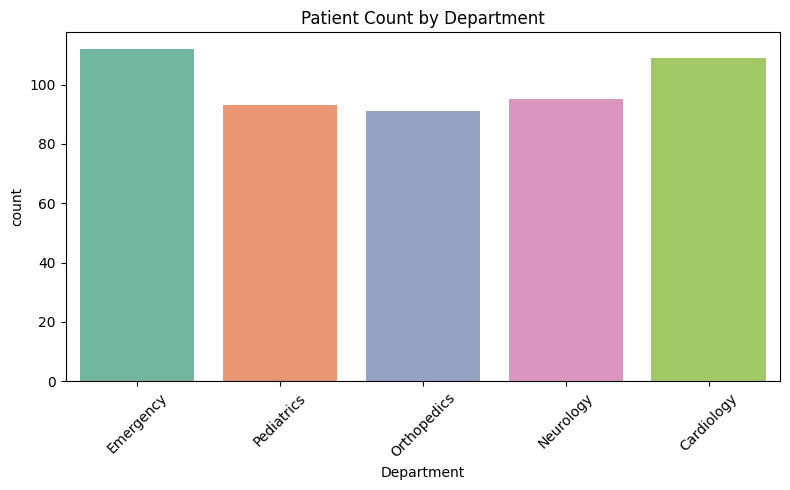

In [2]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Department', palette='Set2')
plt.title('Patient Count by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


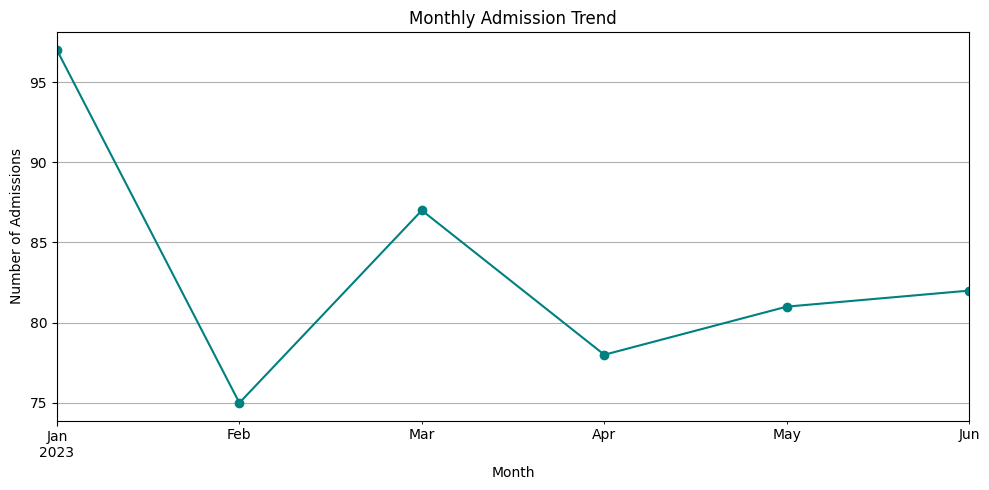

In [3]:
admission_trend = data.groupby(data['Admission_Date'].dt.to_period('M')).size()
admission_trend.index = admission_trend.index.to_timestamp()

plt.figure(figsize=(10, 5))
admission_trend.plot(marker='o', color='teal')
plt.title('Monthly Admission Trend')
plt.ylabel('Number of Admissions')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-4-711234784>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Department', y='Cost', palette='coolwarm')


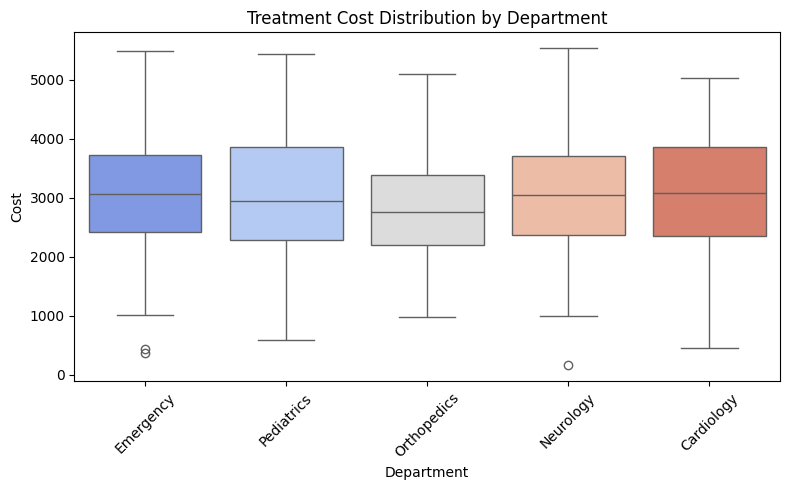

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Department', y='Cost', palette='coolwarm')
plt.title('Treatment Cost Distribution by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


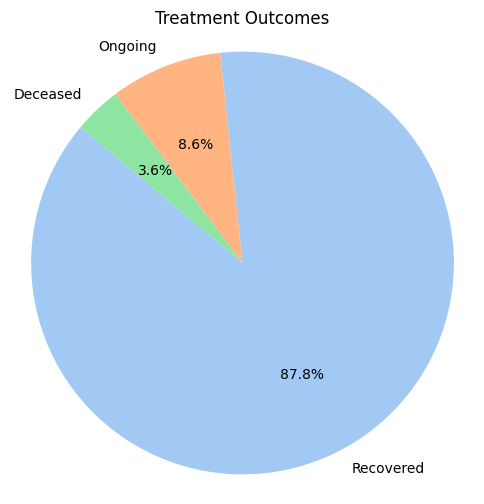

In [5]:
outcome_counts = data['Outcome'].value_counts()
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Treatment Outcomes')
plt.axis('equal')
plt.show()


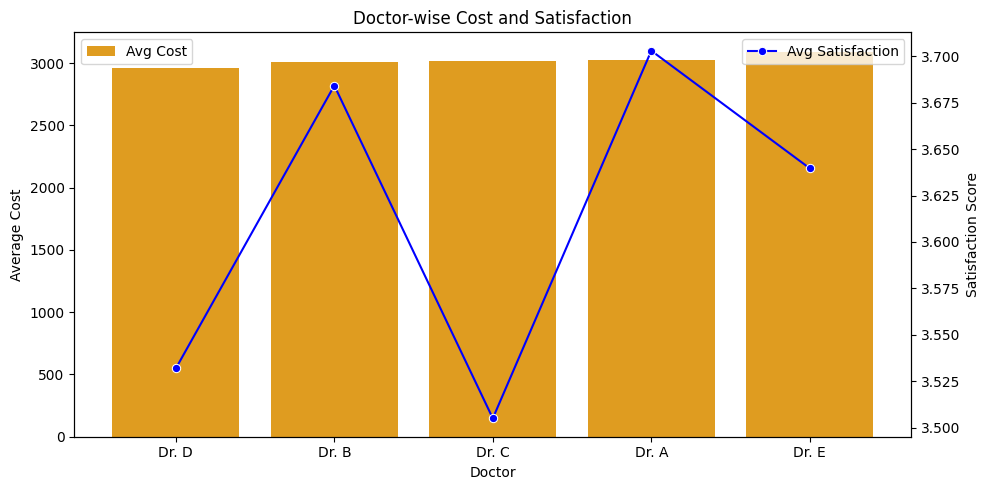

In [6]:
grouped = data.groupby('Doctor').agg({'Cost': 'mean', 'Satisfaction': 'mean'}).sort_values('Cost')

fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x=grouped.index, y=grouped['Cost'], ax=ax1, color='orange', label='Avg Cost')
ax2 = ax1.twinx()
sns.lineplot(x=grouped.index, y=grouped['Satisfaction'], ax=ax2, color='blue', marker='o', label='Avg Satisfaction')

ax1.set_ylabel("Average Cost")
ax2.set_ylabel("Satisfaction Score")
ax1.set_title("Doctor-wise Cost and Satisfaction")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


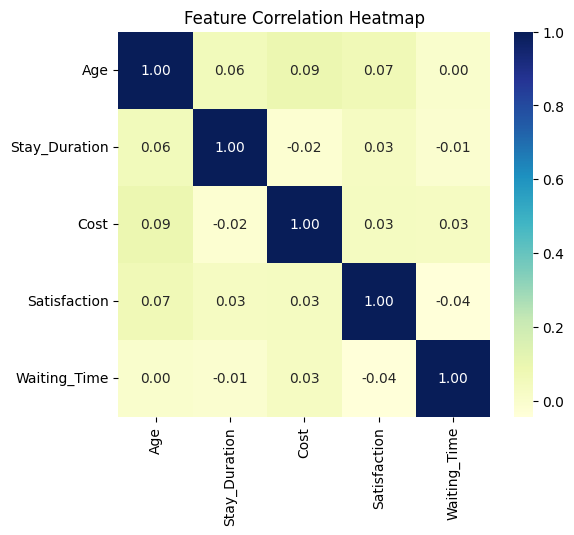

In [7]:
plt.figure(figsize=(6,5))
corr = data[['Age', 'Stay_Duration', 'Cost', 'Satisfaction', 'Waiting_Time']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


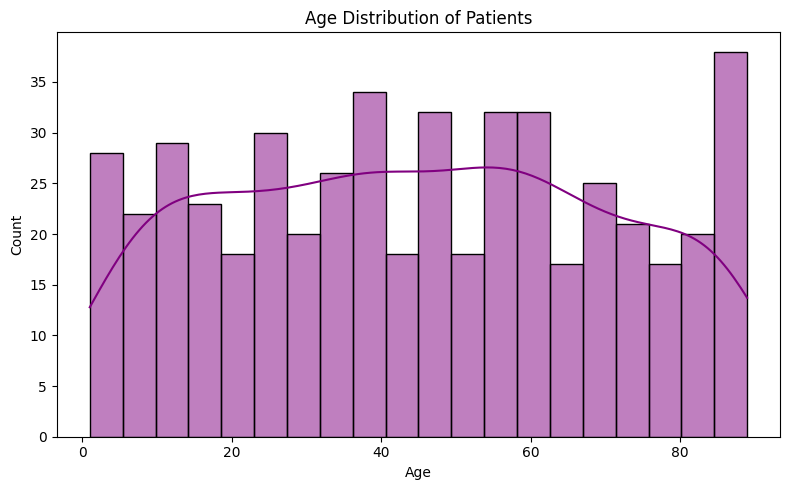

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Patients')
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [9]:
summary = data.groupby('Department').agg({
    'Patient_ID': 'count',
    'Cost': ['mean', 'std'],
    'Stay_Duration': 'mean',
    'Satisfaction': 'mean'
}).round(2)

summary.columns = ['Patients', 'Avg Cost', 'Cost Std', 'Avg Stay', 'Avg Satisfaction']
print("\n📋 Department Summary:\n")
print(summary)



📋 Department Summary:

             Patients  Avg Cost  Cost Std  Avg Stay  Avg Satisfaction
Department                                                           
Cardiology        109   3063.35   1005.62      3.10              3.51
Emergency         112   3091.86    985.74      3.01              3.71
Neurology          95   3041.23    960.59      3.03              3.56
Orthopedics        91   2881.87    941.45      3.14              3.59
Pediatrics         93   3012.01   1071.05      3.15              3.69
